In [24]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

from ffx_learn import learn_ffx
from ffx_learn import call_ffx

In [32]:
importlib.reload(learn_ffx)
importlib.reload(call_ffx)

<module 'ffx_learn.call_ffx' from '/home/happyling/project/python/SymbolicRegression/ffx_learn/call_ffx.py'>

In [35]:
data_0134 = pd.read_csv("data_ijcai/interpolation_10s_int/0134.csv")
data_0134_pca = pd.read_csv("data_ijcai/pca1/0134.csv")

In [36]:
data_0134.columns

Index(['Unnamed: 0', 'BTSJ', 'ZX_WD_1_1', 'ZX_WD_1_2', 'ZX_WD_1_3',
       'ZX_WD_1_4', 'ZX_WD_1_5', 'ZX_WD_1_6', 'ZX_WD_2_1', 'ZX_WD_2_2',
       'ZX_WD_2_3', 'ZX_WD_2_4', 'ZX_WD_2_5', 'ZX_WD_2_6', 'ZX_WD_3_1',
       'ZX_WD_3_2', 'ZX_WD_3_3', 'ZX_WD_3_4', 'ZX_WD_3_5', 'ZX_WD_3_6',
       'ZX_WD_4_1', 'ZX_WD_4_2', 'ZX_WD_4_3', 'ZX_WD_4_4', 'ZX_WD_4_5',
       'ZX_WD_4_6', 'ZX_WD_5_1', 'ZX_WD_5_2', 'ZX_WD_5_3', 'ZX_WD_5_4',
       'ZX_WD_5_5', 'ZX_WD_5_6', 'ZX_WD_6_1', 'ZX_WD_6_2', 'ZX_WD_6_3',
       'ZX_WD_6_4', 'ZX_WD_6_5', 'ZX_WD_6_6', 'ZD_FLAG', 'ZD_ALT', 'ZD_CNT',
       'ZD_LCG', 'ZD_TFG', 'ZD_JHG', 'ZD_LLJ', 'ZD_SPEED', 'ZX_HW1_1',
       'ZX_HW2_1', 'ZX_HW1_2', 'ZX_HW2_2', 'ZX_HW1_3', 'ZX_HW2_3', 'ZX_HW1_4',
       'ZX_HW2_4', 'ZX_HW1_5', 'ZX_HW2_5', 'ZX_HW1_6', 'ZX_HW2_6'],
      dtype='object')

In [37]:
data_0134_pca.columns

Index(['BTSJ', 'ZD_CNT', 'ZD_LCG', 'ZD_TFG', 'ZD_JHG', 'ZD_LLJ', 'ZD_SPEED',
       'ZX_HW1_1', 'ZX_HW1_2', 'ZX_HW1_3', 'ZX_HW1_4', 'ZX_HW1_5', 'ZX_HW1_6',
       'ZX_HW2_1', 'ZX_HW2_2', 'ZX_HW2_3', 'ZX_HW2_4', 'ZX_HW2_5', 'ZX_HW2_6',
       'No1_ZX_WD_1_1', 'No1_ZX_WD_1_2', 'No1_ZX_WD_1_3', 'No1_ZX_WD_1_4',
       'No1_ZX_WD_1_5', 'No1_ZX_WD_1_6', 'No1_ZX_WD_2_1', 'No1_ZX_WD_2_2',
       'No1_ZX_WD_2_3', 'No1_ZX_WD_2_4', 'No1_ZX_WD_2_5', 'No1_ZX_WD_2_6',
       'No1_ZX_WD_3_1', 'No1_ZX_WD_3_2', 'No1_ZX_WD_3_3', 'No1_ZX_WD_3_4',
       'No1_ZX_WD_3_5', 'No1_ZX_WD_3_6', 'No1_ZX_WD_4_1', 'No1_ZX_WD_4_2',
       'No1_ZX_WD_4_3', 'No1_ZX_WD_4_4', 'No1_ZX_WD_4_5', 'No1_ZX_WD_4_6',
       'No1_ZX_WD_5_1', 'No1_ZX_WD_5_2', 'No1_ZX_WD_5_3', 'No1_ZX_WD_5_4',
       'No1_ZX_WD_5_5', 'No1_ZX_WD_5_6', 'No1_ZX_WD_6_1', 'No1_ZX_WD_6_2',
       'No1_ZX_WD_6_3', 'No1_ZX_WD_6_4', 'No1_ZX_WD_6_5', 'No1_ZX_WD_6_6',
       'No2_ZX_WD_1_1', 'No2_ZX_WD_2_1', 'No2_ZX_WD_3_1', 'No2_ZX_WD_4_1',
       'No2_ZX_

In [30]:
y = data_0134_pca['ZX_HW1_1']
#y = data_0134['ZX_WD_1_1']
X = data_0134.drop(['BTSJ', 'ZD_FLAG', 'ZD_ALT','ZX_HW1_1',
       'ZX_HW2_1', 'ZX_HW1_2', 'ZX_HW2_2', 'ZX_HW1_3', 'ZX_HW2_3', 'ZX_HW1_4',
       'ZX_HW2_4', 'ZX_HW1_5', 'ZX_HW2_5', 'ZX_HW1_6', 'ZX_HW2_6'], axis=1)
#X = data_0134[['ZX_WD_1_2', 'ZX_WD_1_3','ZX_WD_1_4', 'ZX_WD_1_5', 'ZX_WD_1_6']]

/home/happyling/project/python/SymbolicRegression/ffx_learn/core.py:865: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  st, fin, num=ss.numAlphas() * 10)[::-1][:ss.numAlphas() / 4]
/home/happyling/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


******************** Z ********************
0.000586
-17.0 + 0.0204*ZX_WD_3_5 * ZX_WD_1_1
-17.4 + 0.0209*ZX_WD_3_5 * ZX_WD_1_1 + 6.59e-5*ZX_WD_3_5 * ZX_WD_3_1
-41.7 + 0.606*ZX_WD_3_3 + 0.459*ZX_WD_3_5 + 0.353*ZX_WD_3_1
-54.9 + 0.744*ZX_WD_3_5 + 0.420*ZX_WD_3_1 + 0.386*ZX_WD_3_3 + 0.363*ZX_WD_3_4
-65.4 + 1.01*ZX_WD_3_5 + 0.549*ZX_WD_3_4 + 0.380*ZX_WD_3_1 + 0.194*ZX_WD_3_6 + 0.182*ZX_WD_3_3
-163 + 44.8*log10(ZX_WD_3_5) + 23.2*log10(ZX_WD_3_3) + 16.5*log10(ZX_WD_3_4) + 14.1*log10(ZX_WD_5_6) * log10(ZX_WD_3_6) + 0.384*ZX_WD_3_5 + 7.74e-8*Unnamed: 0^2
-31.6 - 43.5*log10(ZD_TFG) + 43.2*log10(ZX_WD_3_5) + 22.6*log10(ZX_WD_3_3) + 14.7*log10(ZX_WD_3_4) + 14.0*log10(ZX_WD_5_6) * log10(ZX_WD_3_6) + 0.433*ZX_WD_3_5 + 0.000313*ZX_WD_5_6^2 - 2.92e-5*ZD_TFG^2 + 7.95e-8*Unnamed: 0^2
276 + 1.14*ZX_WD_3_5 - 0.633*ZD_TFG + 0.595*ZX_WD_5_6 + 0.261*ZX_WD_3_3 + 0.166*ZX_WD_3_6 - 0.161*ZX_WD_2_3 + 0.141*ZX_WD_3_4 + 0.0813*ZX_WD_4_3 + 0.000966*ZD_JHG + 0.000161*Unnamed: 0
366 + 0.873*ZX_WD_3_5 - 0.798*ZD_TFG 

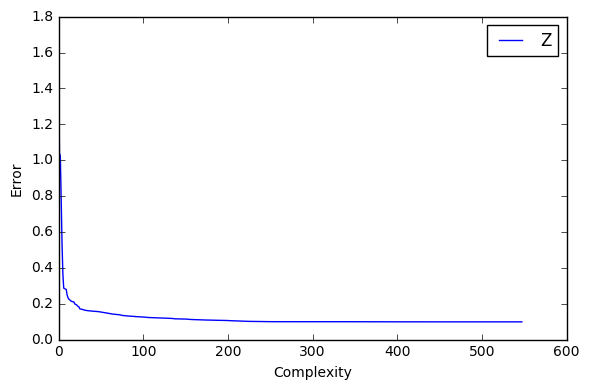

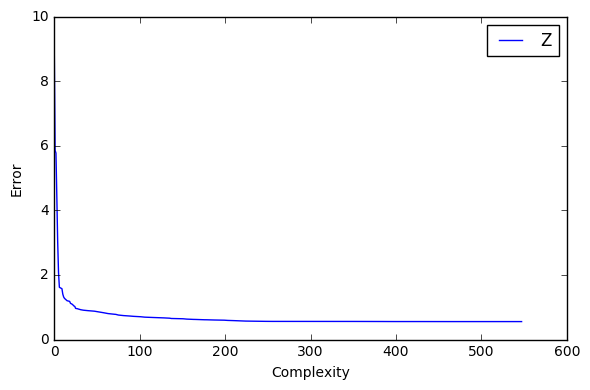

In [31]:
results = list()
result = call_ffx.run_ffx_main_half(X.as_matrix(), y.values, X.columns, verbose=False)
results.insert(len(results), result)
learn_ffx.result_summary(results, 'ZX_WD_1_1')